# News Popularity Online Prediciton

## Importing Relevant Libraries

In [231]:
#Relevant Analysis Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm

#Relevant Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Relevant Preprocessing Libraries
from sklearn.model_selection import train_test_split

#Setting Seaborn as Default Visualization Library
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

## Loading Data

In [232]:
#Reading .csv file and saving as data_raw
data_raw = pd.read_csv('C:\\Users\\DELL\\Desktop\\Akshay\\Projects\\news_popularity_online\\news_popularity_online_dataset.csv')

## 1. Data Exploration

In [233]:
#Exploring the Data Set
data_raw

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [234]:
#Exploring the Attributesin the Data Set
data_raw.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

### Observations:
### Attributes Information:

#### Non Predictive Attributes:
1. url: URL of the article
2. timedelta: Days between the article publication and the dataset acquisition

#### No of Words/Unique_Words/Non_Stop_Words in Title/Content and their Rates: 
3. n_tokens_title: Number of words in the title
4. n_tokens_content: Number of words in the content
5. n_unique_tokens: Rate of unique words in the content
6. n_non_stop_words: Rate of non-stop words in the content
7. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
8. average_token_length: Average length of the words in the content
9. num_keywords: Number of keywords in the metadata

#### No of Links/Self_links/Imgs/Vids: 
10. num_hrefs: Number of links
11. num_self_hrefs: Number of links to other articles published by Mashable
12. num_imgs: Number of images
13. num_videos: Number of videos

#### Data_channel Type: 
14. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
15. data_channel_is_entertainment: Is data channel 'Entertainment'?
16. data_channel_is_bus: Is data channel 'Business'?
17. data_channel_is_socmed: Is data channel 'Social Media'?
18. data_channel_is_tech: Is data channel 'Tech'?
19. data_channel_is_world: Is data channel 'World'?

#### Worst/Best/Avg keyword shared Min/Max/Avg times:
20. kw_min_min: Worst keyword (min. shares)
21. kw_max_min: Worst keyword (max. shares)
22. kw_avg_min: Worst keyword (avg. shares)
23. kw_min_max: Best keyword (min. shares)
24. kw_max_max: Best keyword (max. shares)
25. kw_avg_max: Best keyword (avg. shares)
26. kw_min_avg: Avg. keyword (min. shares)
27. kw_max_avg: Avg. keyword (max. shares)
28. kw_avg_avg: Avg. keyword (avg. shares)

#### Min/Max/Avg shares of referenced articles in Mashable:
29. self_reference_min_shares: Min. shares of referenced articles in Mashable
30. self_reference_max_shares: Max. shares of referenced articles in Mashable
31. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable

#### Published Day in the week:
32. weekday_is_monday: Was the article published on a Monday?
33. weekday_is_tuesday: Was the article published on a Tuesday?
34. weekday_is_wednesday: Was the article published on a Wednesday?
35. weekday_is_thursday: Was the article published on a Thursday?
36. weekday_is_friday: Was the article published on a Friday?
37. weekday_is_saturday: Was the article published on a Saturday?
38. weekday_is_sunday: Was the article published on a Sunday?
39. is_weekend: Was the article published on the weekend?

#### Closeness to LDA topic 0/1/2/3/4:
40. LDA_00: Closeness to LDA topic 0
41. LDA_01: Closeness to LDA topic 1
42. LDA_02: Closeness to LDA topic 2
43. LDA_03: Closeness to LDA topic 3
44. LDA_04: Closeness to LDA topic 4

#### Text/Title subjectivity and polarity
45. global_subjectivity: Text subjectivity
46. global_sentiment_polarity: Text sentiment polarity
47. global_rate_positive_words: Rate of positive words in the content
48. global_rate_negative_words: Rate of negative words in the content
49. rate_positive_words: Rate of positive words among non-neutral tokens
50. rate_negative_words: Rate of negative words among non-neutral tokens
51. avg_positive_polarity: Avg. polarity of positive words
52. min_positive_polarity: Min. polarity of positive words
53. max_positive_polarity: Max. polarity of positive words
54. avg_negative_polarity: Avg. polarity of negative words
55. min_negative_polarity: Min. polarity of negative words
56. max_negative_polarity: Max. polarity of negative words
57. title_subjectivity: Title subjectivity
58. title_sentiment_polarity: Title polarity
59. abs_title_subjectivity: Absolute subjectivity level
60. abs_title_sentiment_polarity: Absolute polarity level

#### Shares; Target Attribute:
61. shares: Number of shares (target)

### Dataframe; Non Predictive Attributes:

In [235]:
data_raw[['url', ' timedelta', ' shares']]

,url,timedelta,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,505
...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,1100


In [236]:
data_raw[['url', ' timedelta', ' shares']].describe(include='all')

,url,timedelta,shares
count,39644,39644.000000,39644.000000
unique,39644,NaN,NaN
top,http://mashable.com/2013/03/13/netflix-faceboo...,NaN,NaN
freq,1,NaN,NaN
mean,NaN,354.530471,3395.380184
std,NaN,214.163767,11626.950749
min,NaN,8.000000,1.000000
25%,NaN,164.000000,946.000000
50%,NaN,339.000000,1400.000000
75%,NaN,542.000000,2800.000000


In [237]:
data_raw[[ ' shares', 'url', ' timedelta']].corr()

,shares,timedelta
shares,1.000000,0.008662
timedelta,0.008662,1.000000


### Dataframe; No of Words and their Rates: 

In [238]:
data_raw[[' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', 
          ' n_non_stop_unique_tokens', ' average_token_length', ' num_keywords', ' shares']]

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,num_keywords,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.680365,5.0,593
1,9.0,255.0,0.604743,1.0,0.791946,4.913725,4.0,711
2,9.0,211.0,0.575130,1.0,0.663866,4.393365,6.0,1500
3,9.0,531.0,0.503788,1.0,0.665635,4.404896,7.0,1200
4,13.0,1072.0,0.415646,1.0,0.540890,4.682836,7.0,505
...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,4.523121,8.0,1800
39640,12.0,328.0,0.696296,1.0,0.885057,4.405488,7.0,1900
39641,10.0,442.0,0.516355,1.0,0.644128,5.076923,8.0,1900
39642,6.0,682.0,0.539493,1.0,0.692661,4.975073,5.0,1100


In [239]:
data_raw[[' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', 
          ' n_non_stop_unique_tokens', ' average_token_length', ' num_keywords', ' shares']].describe(include='all')

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,num_keywords,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,4.548239,7.223767,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,0.844406,1.909130,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.478404,6.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,4.664082,7.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,4.854839,9.000000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,8.041534,10.000000,843300.000000


In [240]:
data_raw[[ ' shares', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', 
          ' n_non_stop_unique_tokens', ' average_token_length', ' num_keywords']].corr()

,shares,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,num_keywords
shares,1.000000,0.008783,0.002459,0.000806,0.000443,0.000114,-0.022007,0.021818
n_tokens_title,0.008783,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.071403,-0.006077
n_tokens_content,0.002459,0.018160,1.000000,-0.004737,0.017512,0.000373,0.167789,0.072845
n_unique_tokens,0.000806,-0.005318,-0.004737,1.000000,0.999572,0.999852,0.026407,-0.003679
n_non_stop_words,0.000443,-0.004754,0.017512,0.999572,1.000000,0.999532,0.031554,-0.001439
n_non_stop_unique_tokens,0.000114,-0.005420,0.000373,0.999852,0.999532,1.000000,0.034185,-0.004440
average_token_length,-0.022007,-0.071403,0.167789,0.026407,0.031554,0.034185,1.000000,-0.016814
num_keywords,0.021818,-0.006077,0.072845,-0.003679,-0.001439,-0.004440,-0.016814,1.000000


### Dataframe; No of Links/Self_links/Imgs/Vids

In [241]:
data_raw[[' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' shares']]

,num_hrefs,num_self_hrefs,num_imgs,num_videos,shares
0,4.0,2.0,1.0,0.0,593
1,3.0,1.0,1.0,0.0,711
2,3.0,1.0,1.0,0.0,1500
3,9.0,0.0,1.0,0.0,1200
4,19.0,19.0,20.0,0.0,505
...,...,...,...,...,...
39639,9.0,7.0,1.0,1.0,1800
39640,9.0,7.0,3.0,48.0,1900
39641,24.0,1.0,12.0,1.0,1900
39642,10.0,1.0,1.0,0.0,1100


In [242]:
data_raw[[' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' shares']].describe(include='all')

,num_hrefs,num_self_hrefs,num_imgs,num_videos,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.883690,3.293638,4.544143,1.249874,3395.380184
std,11.332017,3.855141,8.309434,4.107855,11626.950749
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,1.000000,1.000000,0.000000,946.000000
50%,8.000000,3.000000,1.000000,0.000000,1400.000000
75%,14.000000,4.000000,4.000000,1.000000,2800.000000
max,304.000000,116.000000,128.000000,91.000000,843300.000000


In [243]:
data_raw[[ ' shares', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos']].corr()

,shares,num_hrefs,num_self_hrefs,num_imgs,num_videos
shares,1.000000,0.045404,-0.001900,0.039388,0.023936
num_hrefs,0.045404,1.000000,0.396452,0.342633,0.114518
num_self_hrefs,-0.001900,0.396452,1.000000,0.238586,0.077458
num_imgs,0.039388,0.342633,0.238586,1.000000,-0.067336
num_videos,0.023936,0.114518,0.077458,-0.067336,1.000000


### Dataframe; Data Channel Type

In [244]:
data_raw[[' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', 
          ' data_channel_is_socmed', ' data_channel_is_tech',' data_channel_is_world', ' shares']]

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,shares
0,0.0,1.0,0.0,0.0,0.0,0.0,593
1,0.0,0.0,1.0,0.0,0.0,0.0,711
2,0.0,0.0,1.0,0.0,0.0,0.0,1500
3,0.0,1.0,0.0,0.0,0.0,0.0,1200
4,0.0,0.0,0.0,0.0,1.0,0.0,505
...,...,...,...,...,...,...,...
39639,0.0,0.0,0.0,0.0,1.0,0.0,1800
39640,0.0,0.0,0.0,1.0,0.0,0.0,1900
39641,0.0,0.0,0.0,0.0,0.0,0.0,1900
39642,0.0,0.0,0.0,0.0,0.0,1.0,1100


In [245]:
data_raw[[' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', 
          ' data_channel_is_socmed', ' data_channel_is_tech',' data_channel_is_world', ' shares']].describe(include='all')

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,3395.380184
std,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,11626.950749
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,946.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1400.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2800.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,843300.000000


In [246]:
data_raw[[ ' shares', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', 
          ' data_channel_is_socmed', ' data_channel_is_tech',' data_channel_is_world']].corr()

,shares,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
shares,1.000000,0.005831,-0.017006,-0.012376,0.005021,-0.013253,-0.049497
data_channel_is_lifestyle,0.005831,1.000000,-0.110032,-0.102368,-0.058990,-0.112763,-0.122849
data_channel_is_entertainment,-0.017006,-0.110032,1.000000,-0.201476,-0.116101,-0.221935,-0.241785
data_channel_is_bus,-0.012376,-0.102368,-0.201476,1.000000,-0.108015,-0.206478,-0.224945
data_channel_is_socmed,0.005021,-0.058990,-0.116101,-0.108015,1.000000,-0.118983,-0.129625
data_channel_is_tech,-0.013253,-0.112763,-0.221935,-0.206478,-0.118983,1.000000,-0.247787
data_channel_is_world,-0.049497,-0.122849,-0.241785,-0.224945,-0.129625,-0.247787,1.000000


### Dataframe; Worst/Best/Avg keyword shared Min/Max/Avg times

In [247]:
data_raw[[' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', 
          ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' shares']]

,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,shares
0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,593
1,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,711
2,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1500
3,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1200
4,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,505
...,...,...,...,...,...,...,...,...,...,...
39639,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,1800
39640,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,1900
39641,-1.0,691.0,168.250,6200.0,843300.0,295850.000000,1753.882353,6880.687034,4206.439195,1900
39642,-1.0,0.0,-1.000,0.0,843300.0,254600.000000,0.000000,3384.316871,1777.895883,1100


In [248]:
data_raw[[' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', 
          ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' shares']].describe(include='all')

,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3395.380184
std,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,11626.950749
min,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,946.000000
50%,-1.000000,660.000000,235.500000,1400.000000,843300.000000,244572.222223,1023.635611,4355.688836,2870.074878,1400.000000
75%,4.000000,1000.000000,357.000000,7900.000000,843300.000000,330980.000000,2056.781032,6019.953968,3600.229564,2800.000000
max,377.000000,298400.000000,42827.857143,843300.000000,843300.000000,843300.000000,3613.039820,298400.000000,43567.659946,843300.000000


In [249]:
data_raw[[ ' shares', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', 
          ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg']].corr()

,shares,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
shares,1.000000,-0.001051,0.030114,0.030406,0.003901,0.007863,0.044686,0.039551,0.064306,0.110413
kw_min_min,-0.001051,1.000000,0.011534,0.112829,-0.062433,-0.857226,-0.502719,-0.137094,-0.073563,-0.184018
kw_max_min,0.030114,0.011534,1.000000,0.940529,-0.036475,-0.005425,-0.034936,0.007079,0.590468,0.411261
kw_avg_min,0.030406,0.112829,0.940529,1.000000,-0.062958,-0.106933,-0.129136,-0.021295,0.545686,0.384317
kw_min_max,0.003901,-0.062433,-0.036475,-0.062958,1.000000,0.065866,0.411493,0.353099,0.028394,0.172242
kw_max_max,0.007863,-0.857226,-0.005425,-0.106933,0.065866,1.000000,0.563353,0.158727,0.092658,0.226998
kw_avg_max,0.044686,-0.502719,-0.034936,-0.129136,0.411493,0.563353,1.000000,0.407677,0.139530,0.427308
kw_min_avg,0.039551,-0.137094,0.007079,-0.021295,0.353099,0.158727,0.407677,1.000000,0.093030,0.451569
kw_max_avg,0.064306,-0.073563,0.590468,0.545686,0.028394,0.092658,0.139530,0.093030,1.000000,0.811864
kw_avg_avg,0.110413,-0.184018,0.411261,0.384317,0.172242,0.226998,0.427308,0.451569,0.811864,1.000000


### Dataframe; Min/Max/Avg shares of referenced articles in Mashable

In [250]:
data_raw[[' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' shares']]

,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,shares
0,496.0,496.0,496.000000,593
1,0.0,0.0,0.000000,711
2,918.0,918.0,918.000000,1500
3,0.0,0.0,0.000000,1200
4,545.0,16000.0,3151.157895,505
...,...,...,...,...
39639,11400.0,48000.0,37033.333333,1800
39640,2100.0,2100.0,2100.000000,1900
39641,1400.0,1400.0,1400.000000,1900
39642,452.0,452.0,452.000000,1100


In [251]:
data_raw[[' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' shares']].describe(include='all')

,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,shares
count,39644.000000,39644.000000,39644.000000,39644.000000
mean,3998.755396,10329.212662,6401.697580,3395.380184
std,19738.670516,41027.576613,24211.332231,11626.950749
min,0.000000,0.000000,0.000000,1.000000
25%,639.000000,1100.000000,981.187500,946.000000
50%,1200.000000,2800.000000,2200.000000,1400.000000
75%,2600.000000,8000.000000,5200.000000,2800.000000
max,843300.000000,843300.000000,843300.000000,843300.000000


In [252]:
data_raw[[' shares', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess']].corr()

,shares,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess
shares,1.000000,0.055958,0.047115,0.057789
self_reference_min_shares,0.055958,1.000000,0.480476,0.818907
self_reference_max_shares,0.047115,0.480476,1.000000,0.853480
self_reference_avg_sharess,0.057789,0.818907,0.853480,1.000000


### Dataframe; Published Day in the week

In [253]:
data_raw[[' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', 
          ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' shares']]

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,shares
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,593
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,711
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1200
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,505
...,...,...,...,...,...,...,...,...,...
39639,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1800
39640,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1900
39641,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1900
39642,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1100


In [254]:
data_raw[[' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', 
          ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' shares']].describe(include='all')

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,3395.380184
std,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,11626.950749
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,946.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1400.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2800.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,843300.000000


In [255]:
data_raw[[' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', 
          ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' shares']].corr()

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,shares
weekday_is_monday,1.000000,-0.215107,-0.215912,-0.212904,-0.184173,-0.115413,-0.122379,-0.174417,0.009726
weekday_is_tuesday,-0.215107,1.000000,-0.229976,-0.226772,-0.196169,-0.122931,-0.130351,-0.185778,-0.007941
weekday_is_wednesday,-0.215912,-0.229976,1.000000,-0.227620,-0.196903,-0.123390,-0.130838,-0.186473,-0.003801
weekday_is_thursday,-0.212904,-0.226772,-0.227620,1.000000,-0.194160,-0.121672,-0.129016,-0.183875,-0.008833
weekday_is_friday,-0.184173,-0.196169,-0.196903,-0.194160,1.000000,-0.105252,-0.111605,-0.159061,-0.003884
weekday_is_saturday,-0.115413,-0.122931,-0.123390,-0.121672,-0.105252,1.000000,-0.069938,0.661707,0.015082
weekday_is_sunday,-0.122379,-0.130351,-0.130838,-0.129016,-0.111605,-0.069938,1.000000,0.701648,0.008230
is_weekend,-0.174417,-0.185778,-0.186473,-0.183875,-0.159061,0.661707,0.701648,1.000000,0.016958
shares,0.009726,-0.007941,-0.003801,-0.008833,-0.003884,0.015082,0.008230,0.016958,1.000000


### Dataframe; Closeness to LDA topic 0/1/2/3/4

In [256]:
data_raw[[' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' shares']]

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,shares
0,0.500331,0.378279,0.040005,0.041263,0.040123,593
1,0.799756,0.050047,0.050096,0.050101,0.050001,711
2,0.217792,0.033334,0.033351,0.033334,0.682188,1500
3,0.028573,0.419300,0.494651,0.028905,0.028572,1200
4,0.028633,0.028794,0.028575,0.028572,0.885427,505
...,...,...,...,...,...,...
39639,0.025038,0.025001,0.151701,0.025000,0.773260,1800
39640,0.029349,0.028575,0.231866,0.681635,0.028575,1900
39641,0.159004,0.025025,0.025207,0.643794,0.146970,1900
39642,0.040004,0.040003,0.839987,0.040002,0.040004,1100


In [257]:
data_raw[[' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' shares']].describe(include='all')

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,0.184599,0.141256,0.216321,0.223770,0.234029,3395.380184
std,0.262975,0.219707,0.282145,0.295191,0.289183,11626.950749
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.025051,0.025012,0.028571,0.028571,0.028574,946.000000
50%,0.033387,0.033345,0.040004,0.040001,0.040727,1400.000000
75%,0.240958,0.150831,0.334218,0.375763,0.399986,2800.000000
max,0.926994,0.925947,0.919999,0.926534,0.927191,843300.000000


In [258]:
data_raw[[' shares', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04']].corr()

,shares,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04
shares,1.000000,-0.003793,-0.010183,-0.059163,0.083771,-0.016622
LDA_00,-0.003793,1.000000,-0.179342,-0.255555,-0.274588,-0.243426
LDA_01,-0.010183,-0.179342,1.000000,-0.231720,-0.121660,-0.246339
LDA_02,-0.059163,-0.255555,-0.231720,1.000000,-0.328642,-0.231683
LDA_03,0.083771,-0.274588,-0.121660,-0.328642,1.000000,-0.357930
LDA_04,-0.016622,-0.243426,-0.246339,-0.231683,-0.357930,1.000000


### Dataframe; Text/Title subjectivity and polarity

In [259]:
data_raw[[' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', 
          ' global_rate_negative_words', ' rate_positive_words', ' rate_negative_words', ' avg_positive_polarity', 
          ' min_positive_polarity', ' max_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity', 
          ' max_negative_polarity', ' title_subjectivity', ' title_sentiment_polarity', ' abs_title_subjectivity', 
          ' abs_title_sentiment_polarity', ' shares']]

,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,0.564374,0.194249,0.039634,0.009146,0.812500,0.187500,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,0.510296,0.024609,0.033937,0.024887,0.576923,0.423077,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,0.358578,-0.008066,0.020528,0.023460,0.466667,0.533333,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [260]:
data_raw[[' shares',' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', 
          ' global_rate_negative_words', ' rate_positive_words', ' rate_negative_words', ' avg_positive_polarity', 
          ' min_positive_polarity', ' max_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity', 
          ' max_negative_polarity', ' title_subjectivity', ' title_sentiment_polarity', ' abs_title_subjectivity', 
          ' abs_title_sentiment_polarity', ' shares']].describe(include='all')

,shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,3395.380184,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,11626.950749,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,1.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,946.000000,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,1400.000000,0.453457,0.119117,0.039023,0.015337,0.710526,0.280000,0.358755,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,2800.000000,0.508333,0.177832,0.050279,0.021739,0.800000,0.384615,0.411428,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,843300.000000,1.000000,0.727841,0.155488,0.184932,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [261]:
data_raw[[' shares', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', 
          ' global_rate_negative_words', ' rate_positive_words', ' rate_negative_words', ' avg_positive_polarity', 
          ' min_positive_polarity', ' max_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity', 
          ' max_negative_polarity', ' title_subjectivity', ' title_sentiment_polarity', ' abs_title_subjectivity', 
          ' abs_title_sentiment_polarity']].corr()

,shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
shares,1.000000,0.031604,0.004163,0.000543,0.006615,-0.013241,-0.005183,0.012142,-0.000040,0.010068,-0.032029,-0.019297,-0.019300,0.021967,0.012772,0.001481,0.027135
global_subjectivity,0.031604,1.000000,0.339436,0.467063,0.253181,0.487481,0.132940,0.631749,0.243984,0.518773,-0.443187,-0.350070,-0.223191,0.114123,0.034075,-0.003758,0.091067
global_sentiment_polarity,0.004163,0.339436,1.000000,0.570667,-0.471982,0.727827,-0.650717,0.496704,0.086119,0.430893,0.229764,0.285378,-0.044238,0.023620,0.238266,-0.028717,0.071898
global_rate_positive_words,0.000543,0.467063,0.570667,1.000000,0.106538,0.628626,-0.330125,0.331326,-0.107093,0.473331,-0.131794,-0.115422,-0.072669,0.109938,0.136469,-0.137288,0.103391
global_rate_negative_words,0.006615,0.253181,-0.471982,0.106538,1.000000,-0.398689,0.779556,0.192985,0.060769,0.182928,-0.352242,-0.478499,0.070557,0.090229,-0.138152,-0.055071,0.055872
rate_positive_words,-0.013241,0.487481,0.727827,0.628626,-0.398689,1.000000,-0.530962,0.412733,0.050771,0.451048,-0.034753,0.088708,-0.199162,-0.024194,0.144467,-0.017876,-0.003356
rate_negative_words,-0.005183,0.132940,-0.650717,-0.330125,0.779556,-0.530962,1.000000,0.145689,0.194568,0.035689,-0.346947,-0.452522,0.026644,-0.003934,-0.185787,0.040898,-0.026495
avg_positive_polarity,0.012142,0.631749,0.496704,0.331326,0.192985,0.412733,0.145689,1.000000,0.456973,0.703558,-0.275705,-0.232209,-0.139768,0.052364,0.079529,0.015141,0.101191
min_positive_polarity,-0.000040,0.243984,0.086119,-0.107093,0.060769,0.050771,0.194568,0.456973,1.000000,0.009600,-0.063571,0.091270,-0.183997,0.008327,-0.001301,0.016991,0.011512
max_positive_polarity,0.010068,0.518773,0.430893,0.473331,0.182928,0.451048,0.035689,0.703558,0.009600,1.000000,-0.268784,-0.360871,-0.005253,0.052790,0.076898,-0.017131,0.082966


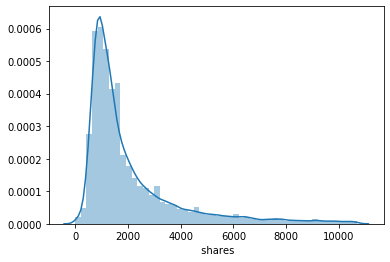

In [262]:
q = data_raw[' shares'].quantile(0.95)
data_1 = data_raw[data_raw[' shares']<q]

sns.distplot(data_1[' shares'])

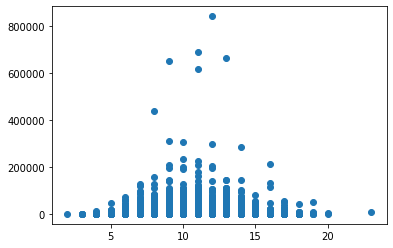

In [300]:
plt.scatter(data_raw[' n_tokens_title'], data_raw[' shares'])

In [269]:
from sklearn.feature_selection import f_regression

In [279]:
target = data_raw[' shares']
features = data_raw.drop(['url', ' shares'], axis=1)

In [280]:
features

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000


In [281]:
f_regression(features, target)

(array([2.97476974e+00, 3.05834574e+00, 2.39700926e-01, 2.57749806e-02,
        7.77765395e-03, 5.16742649e-04, 8.18917554e+01, 1.43168907e-01,
        6.15954777e+01, 2.27253262e+01, 1.92087630e+01, 1.88799684e+01,
        1.34801966e+00, 1.14682107e+01, 6.07287508e+00, 9.99503612e-01,
        6.96389171e+00, 9.73607818e+01, 4.37876189e-02, 3.59819455e+01,
        3.66828357e+01, 6.03406864e-01, 2.45081978e+00, 7.93165070e+01,
        6.21074452e+01, 1.64610050e+02, 4.89239956e+02, 1.24518921e+02,
        8.81948453e+01, 1.32830299e+02, 3.75062831e+00, 2.49974244e+00,
        5.72641199e-01, 3.09335574e+00, 5.98134436e-01, 9.01958579e+00,
        2.68494849e+00, 1.14035277e+01, 5.70350662e-01, 4.11094164e+00,
        1.39243446e+02, 2.80160262e+02, 1.09556687e+01, 3.96346813e+01,
        6.87006909e-01, 1.16984901e-02, 1.73483027e+00, 6.95173545e+00,
        1.06500788e+00, 5.84540053e+00, 6.37296674e-05, 4.01853963e+00,
        4.07085457e+01, 1.47677317e+01, 1.47720746e+01, 1.913789

In [282]:
p_values = f_regression(features, target)[1]

In [283]:
p_values.round(3)

array([0.085, 0.08 , 0.624, 0.872, 0.93 , 0.982, 0.   , 0.705, 0.   ,
       0.   , 0.   , 0.   , 0.246, 0.001, 0.014, 0.317, 0.008, 0.   ,
       0.834, 0.   , 0.   , 0.437, 0.117, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.053, 0.114, 0.449, 0.079, 0.439, 0.003,
       0.101, 0.001, 0.45 , 0.043, 0.   , 0.   , 0.001, 0.   , 0.407,
       0.914, 0.188, 0.008, 0.302, 0.016, 0.994, 0.045, 0.   , 0.   ,
       0.   , 0.   , 0.011, 0.768, 0.   ])

In [287]:
p_val = pd.DataFrame({'Attributes':[' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity'], 'F-Statistic':[2.97476974e+00, 3.05834574e+00, 2.39700926e-01, 2.57749806e-02,
        7.77765395e-03, 5.16742649e-04, 8.18917554e+01, 1.43168907e-01,
        6.15954777e+01, 2.27253262e+01, 1.92087630e+01, 1.88799684e+01,
        1.34801966e+00, 1.14682107e+01, 6.07287508e+00, 9.99503612e-01,
        6.96389171e+00, 9.73607818e+01, 4.37876189e-02, 3.59819455e+01,
        3.66828357e+01, 6.03406864e-01, 2.45081978e+00, 7.93165070e+01,
        6.21074452e+01, 1.64610050e+02, 4.89239956e+02, 1.24518921e+02,
        8.81948453e+01, 1.32830299e+02, 3.75062831e+00, 2.49974244e+00,
        5.72641199e-01, 3.09335574e+00, 5.98134436e-01, 9.01958579e+00,
        2.68494849e+00, 1.14035277e+01, 5.70350662e-01, 4.11094164e+00,
        1.39243446e+02, 2.80160262e+02, 1.09556687e+01, 3.96346813e+01,
        6.87006909e-01, 1.16984901e-02, 1.73483027e+00, 6.95173545e+00,
        1.06500788e+00, 5.84540053e+00, 6.37296674e-05, 4.01853963e+00,
        4.07085457e+01, 1.47677317e+01, 1.47720746e+01, 1.91378924e+01,
        6.46748750e+00, 8.69491610e-02, 2.92107361e+01] , 'p-Values':[0.085, 0.08 , 0.624, 0.872, 0.93 , 0.982, 0.   , 0.705, 0.   ,
       0.   , 0.   , 0.   , 0.246, 0.001, 0.014, 0.317, 0.008, 0.   ,
       0.834, 0.   , 0.   , 0.437, 0.117, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.053, 0.114, 0.449, 0.079, 0.439, 0.003,
       0.101, 0.001, 0.45 , 0.043, 0.   , 0.   , 0.001, 0.   , 0.407,
       0.914, 0.188, 0.008, 0.302, 0.016, 0.994, 0.045, 0.   , 0.   ,
       0.   , 0.   , 0.011, 0.768, 0.   ]})

In [298]:
p_val.sort_values(by=['p-Values', 'F-Statistic']).reset_index()

,index,Attributes,F-Statistic,p-Values
0,53,min_negative_polarity,14.767732,0.000
1,54,max_negative_polarity,14.772075,0.000
2,11,num_keywords,18.879968,0.000
3,55,title_subjectivity,19.137892,0.000
4,10,average_token_length,19.208763,0.000
5,9,num_videos,22.725326,0.000
6,58,abs_title_sentiment_polarity,29.210736,0.000
7,19,kw_max_min,35.981946,0.000
8,20,kw_avg_min,36.682836,0.000
9,43,global_subjectivity,39.634681,0.000


In [302]:
data_raw[' shares']

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name:  shares, Length: 39644, dtype: int64

In [337]:
q1 = data_raw[' shares'].quantile(0.25)
q2 = data_raw[' shares'].quantile(0.5)
q3 = data_raw[' shares'].quantile(0.75)
q5 = data_raw[' shares'].quantile(0.95)
q6 = data_raw[' shares'].quantile(1)

In [338]:
q1

946.0

In [339]:
q2

1400.0

In [340]:
q3

2800.0

In [341]:
q4

6200.0

In [335]:
q5

10800.0

In [336]:
q6

843300.0

In [342]:
bins = [0, 946, 1400, 2800, 6200, 10800, 843300]
labels = ['Least Popular', 'Moderately Popular', 'Popular', 'Highly Popular', 'Extremely Popular', 'Nailed It']
data_raw['popularity'] = pd.cut(data_raw[' shares'], bins, labels=labels)

In [ ]:
c